# **Analisis del conjunto de datos del caso de enfermedades cronicas de Bogota**


link: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Enfermedades-Cr-nicas/2uxx-gxp3/about_data

Integrantes






*   Jesus David Torrenegra Passo.
*   Luis Carlos Hernández Hernández
*   Carlos Junior Ramos Rodríguez



# **Importancion de librerias y la carga de los datos**




In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el archivo de datos
file_path = 'Enfermedades_Cr_nicas_20241111.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para entender el conjunto de datos
data.head()

,EDAD,PLAN_BENEFICIOS,SEDE,NOMBRE_DIAG,PESO,TALLA,IMC,CARDIOVASCULAR,PULMONAR,NEUROLÓGICO,...,covid1,covid2,covid3,GENERO,IDENTGEN,ORIGSEX,GRUPO ETNICO,NIVELEDUCATIVO,TIPODISCAPAC,OCUPACION
0,49,PACIENTES PARTICULARES,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),76.0,157,30.83,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,COCINERA
1,49,PACIENTES PARTICULARES,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),76.0,157,30.83,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,COCINERA
2,68,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),70.0,151,30.70,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,HOGAR
3,82,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),51.0,142,25.29,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,Motora-física,AMA DE CASA
4,59,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),84.0,150,37.33,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,CONDUCTOR


# **Informacion y propiedades de las columnas**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EDAD                   2602 non-null   int64  
 1   PLAN_BENEFICIOS        2602 non-null   object 
 2   SEDE                   2602 non-null   object 
 3   NOMBRE_DIAG            2602 non-null   object 
 4   PESO                   2602 non-null   float64
 5   TALLA                  2602 non-null   int64  
 6   IMC                    2602 non-null   object 
 7   CARDIOVASCULAR         2602 non-null   object 
 8   PULMONAR               2602 non-null   object 
 9   NEUROLÓGICO            2602 non-null   object 
 10  MENTAL                 2602 non-null   object 
 11  OSTEOMUSCULAR          2602 non-null   object 
 12  BODEX                  2602 non-null   object 
 13  RESULTADOIMC           2602 non-null   object 
 14  ESCALA DISNEA          2602 non-null   object 
 15  RIES

**Se puede apreciar los siguientes detalles**


*   2061 registros en total.
*   28 columnas.
*   3 columnas de tipo numerico y 26 columnas de tipo categórico
*   No se tiene datos nulos o faltantes.








# **Análisis estadístico descriptivo**

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EDAD,2602.0,68.269792,13.076867,6.0,61.0,69.0,77.0,102.0
PESO,2602.0,64.020292,17.943791,0.0,55.0,64.0,74.0,175.0
TALLA,2602.0,150.530746,30.022547,0.0,149.0,155.0,161.0,300.0


EDAD: Edad promedio de 68 años, con un rango de 6 a 102 años.
PESO: Peso promedio de 64 kg, pero algunos valores atípicos (0 kg y 175 kg).
TALLA: Altura promedio de 150 cm, también con valores atípicos (0 cm y 300 cm).

In [30]:
data.describe(exclude=[np.number]).T

,count,unique,top,freq
PLAN_BENEFICIOS,2602,8,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,1841
SEDE,2602,14,UNIDAD DE SERVICIOS DE SALUD FERIAS,1282
NOMBRE_DIAG,2602,189,HIPERTENSION ESENCIAL (PRIMARIA),1434
IMC,2602,700,10000.00,46
CARDIOVASCULAR,2602,3,Normal,2505
PULMONAR,2602,3,Normal,2491
NEUROLÓGICO,2602,3,Normal,2497
MENTAL,2602,3,Normal,2401
OSTEOMUSCULAR,2602,3,Normal,2453
BODEX,2602,1,MODERADA,2602


# **Tablas de frecuencias**

In [31]:
frequency_table_Artritis=data['CARDIOVASCULAR'].value_counts()
frequency_table_Diabetes=data['PULMONAR'].value_counts()
frequency_table_Hipertensión=data['NEUROLÓGICO'].value_counts()
frequency_table_EPOC=data['MENTAL'].value_counts()
frequency_table_Asma=data['OSTEOMUSCULAR'].value_counts()


resultados = pd.DataFrame({
    'Enfermedad': ['CARDIOVASCULAR', 'PULMONAR', 'NEUROLÓGICO', 'MENTAL', 'OSTEOMUSCULAR'],
    'NO REGISTRA': [
        frequency_table_Artritis.get(1, 0),
        frequency_table_Diabetes.get(1, 0),
        frequency_table_Hipertensión.get(1, 0),
        frequency_table_EPOC.get(1, 0),
        frequency_table_Asma.get(1, 0),

    ],
    'ANORMAL': [
        frequency_table_Artritis.get(2, 0),
        frequency_table_Diabetes.get(2, 0),
        frequency_table_Hipertensión.get(2, 0),
        frequency_table_EPOC.get(2, 0),
        frequency_table_Asma.get(2, 0),

    ],
    'NORMAL': [
        frequency_table_Artritis.get(0, 0),
        frequency_table_Diabetes.get(0, 0),
        frequency_table_Hipertensión.get(0, 0),
        frequency_table_EPOC.get(0, 0),
        frequency_table_Asma.get(0, 0),

    ]
})

resultados

<ipython-input-31-a3c08d6b4d5c>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequency_table_Artritis.get(1, 0),
<ipython-input-31-a3c08d6b4d5c>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequency_table_Diabetes.get(1, 0),
<ipython-input-31-a3c08d6b4d5c>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequency_table_Hipertensión.get(1, 0),
<ipython-input-31-a3c08d6b4d5c>:14: FutureWarning: Series.__getitem__ treating

,Enfermedad,NO REGISTRA,ANORMAL,NORMAL
0,CARDIOVASCULAR,74,23,2505
1,PULMONAR,85,26,2491
2,NEUROLÓGICO,72,33,2497
3,MENTAL,108,93,2401
4,OSTEOMUSCULAR,86,63,2453


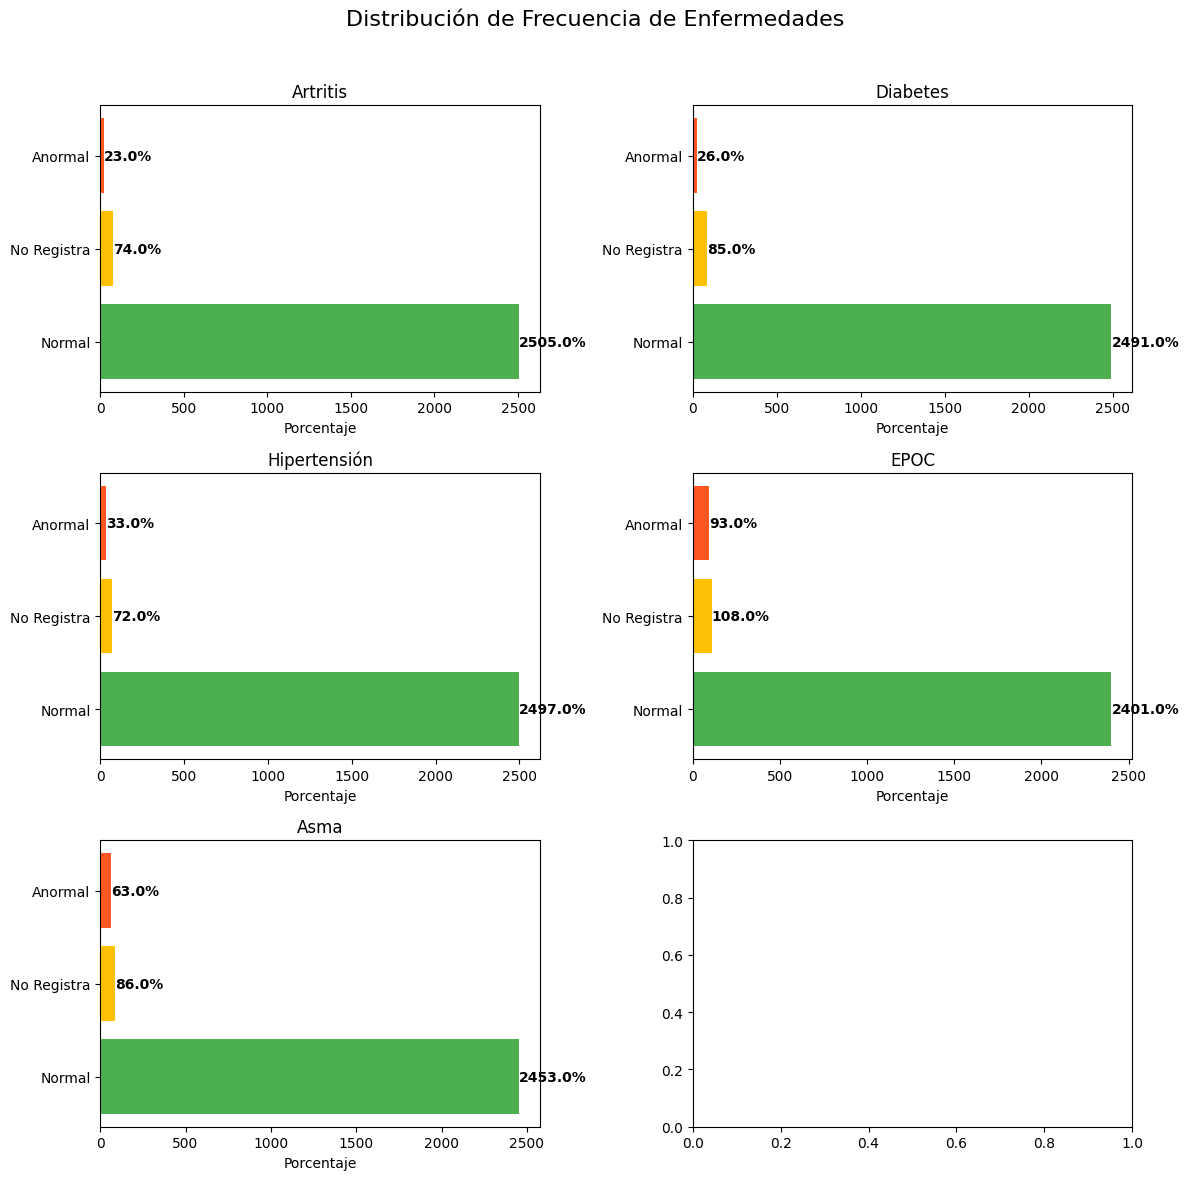

In [32]:
# Crear una figura y definir tamaño
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Distribución de Frecuencia de Enfermedades', fontsize=16)

# Lista de enfermedades y sus tablas de frecuencia
enfermedades = [
    ('Artritis', frequency_table_Artritis),
    ('Diabetes', frequency_table_Diabetes),
    ('Hipertensión', frequency_table_Hipertensión),
    ('EPOC', frequency_table_EPOC),
    ('Asma', frequency_table_Asma)
]

# Iterar sobre las enfermedades y los ejes para graficar
for ax, (enfermedad, freq_table) in zip(axes.flatten(), enfermedades):
    # Crear gráfico de barras horizontales
    ax.barh(freq_table.index, freq_table.values, color=['#4CAF50', '#FFC107', '#FF5722'])
    ax.set_title(enfermedad)
    ax.set_xlabel('Porcentaje')

    # Agregar etiquetas de porcentaje al final de cada barra
    for i, v in enumerate(freq_table.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center', fontweight='bold')

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

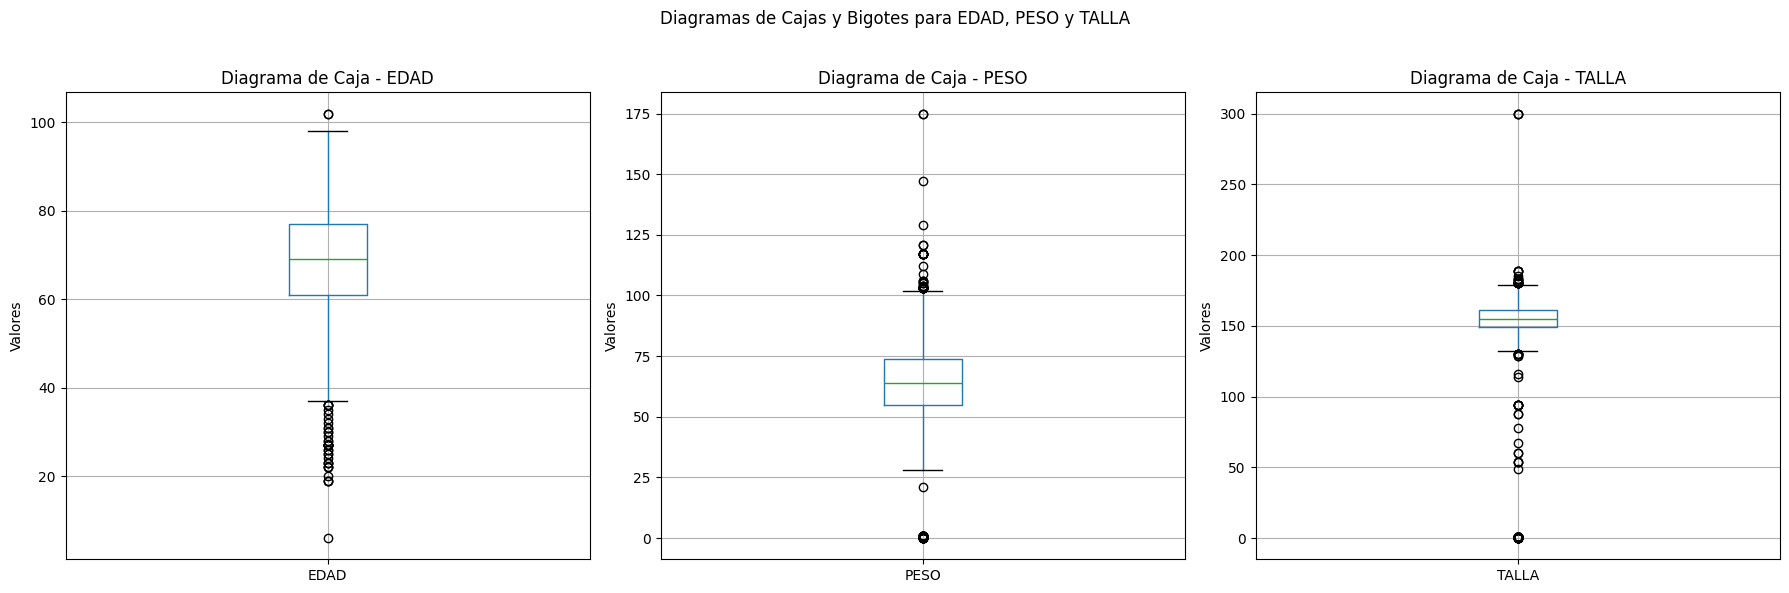

In [33]:


# Seleccionar solo las columnas EDAD, PESO y TALLA
df = data[['EDAD', 'PESO', 'TALLA']]

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Diagramas de Cajas y Bigotes para EDAD, PESO y TALLA')

# Lista de columnas para iterar
columnas = ['EDAD', 'PESO', 'TALLA']

# Crear un diagrama de caja para cada columna
for ax, col in zip(axes, columnas):
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Diagrama de Caja - {col}')
    ax.set_ylabel('Valores')

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Correlacion**

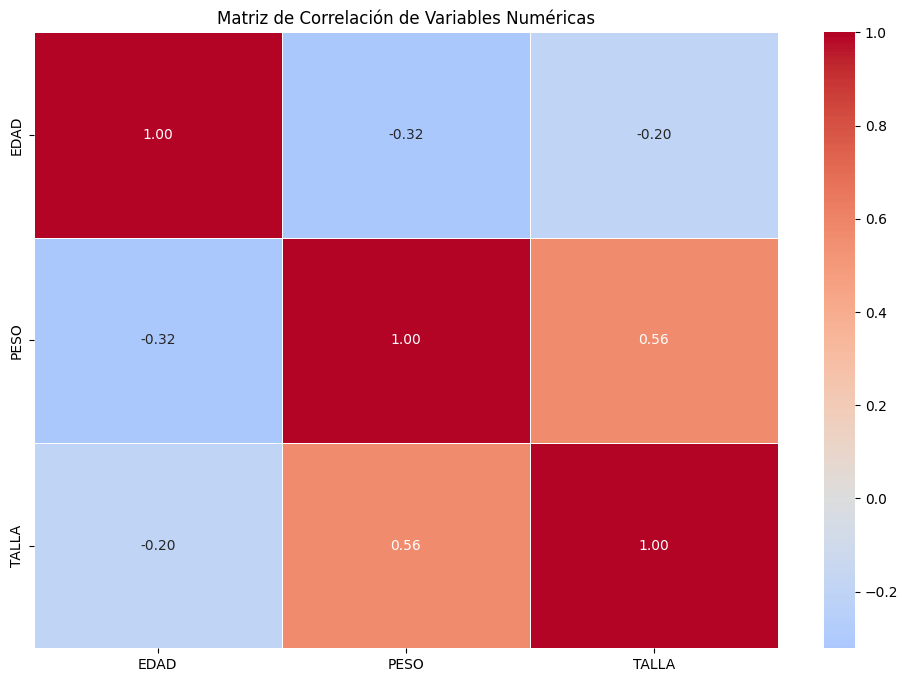

In [34]:

numeric_data = data.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)


plt.title("Matriz de Correlación de Variables Numéricas")


plt.show()

# **Resumen**

*   Estadísticas Generales de Variables Numéricas
Edad: La media es de 68.3 años, con una desviación estándar de 13.1. Los pacientes tienen edades que varían entre 6 y 102 años.
Peso: La media es de 64 kg, con un rango que va desde 0 kg (posible dato erróneo) hasta 175 kg.
Talla: La media es de 150 cm, con un rango desde 0 cm (dato erróneo) hasta 300 cm.
*   Resumen de Variables Categóricas
Plan de Beneficios: La mayoría de los pacientes están afiliados a "Capital Salud EPS SAS - PGP Subsidiado" (1,841 registros).
Género: Predominan los registros femeninos (1,822), seguidos por masculinos (778). Solo 2 pacientes se registran como intersexuales.
Grupo Étnico: La mayoría (2,550) no pertenece a un grupo étnico específico ("Ninguna de las anteriores"), seguidos de 27 personas indígenas y 11 afrocolombianos.
Nivel Educativo: El nivel más frecuente es "Básica Primaria" (1,063 registros), mientras que 755 personas no tienen información registrada.
Ocupación: La ocupación más común es "Hogar" (952), seguida de "No Registra" (619) y "Ama de Casa" (199).
*   Distribución de Tipos de Discapacidad
La mayoría no presenta discapacidad (1,685 registros), pero entre los que sí, predominan las discapacidades "Motora-física" (445) y "Psíquica" (183).

*   La matriz de correlación entre las variables numéricas muestra lo siguiente:

*   Edad y Peso: Correlación negativa de -0.32, lo que indica que, en general, a mayor edad, el peso tiende a disminuir, aunque la relación no es muy fuerte.
Edad y Talla: Correlación negativa de -0.20, sugiriendo una relación débil en la que a mayor edad, la talla podría ser menor.
Peso y Talla: Correlación positiva de 0.56, lo cual indica una relación moderada entre el peso y la talla; es decir, personas con mayor talla tienden a tener un mayor peso.